In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')

In [2]:
df.head()

,Unnamed: 0,genre,period,region,text,title,year
0,0,NEWS,P6,OOD,Aus Stadt und Land.\n\n(Trauergottesdienst.) Z...,Innsbrucker Nachrichten,1915
1,1,NEWS,P6,OMD,Aus Dresdens Zigaretten Industrie\r\n\tDresden...,Arbeiterstimme,1928
2,2,HUMA,P6,WMD,Einleitung.\r\n § 1.\r\n Glaub...,Evangelischer Sozialismus,1920
3,3,DRAM,P6,WMD,Zimmer im Lenz'schen Hause.\r\n(Clara steht au...,Heimkehr,1915
4,4,NEWS,P6,OOD,Lokales.\n(Feuer im Allgemeinen Krankenhause.)...,Wiener Zeitung,1914


In [3]:
df.shape

(638, 7)

# Plot genre distribution

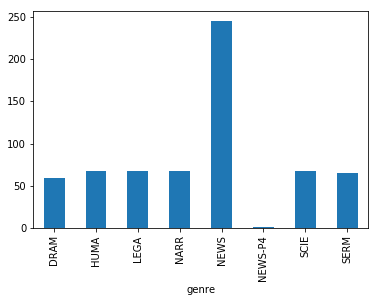

In [8]:
df.groupby('genre').title.count().plot(kind='bar')

=> One text has an invalid genre this should occur while creating the dataset.

=> Every genre except news is somewhat balanced. Maybe we should try applying class weights.

# Plot region distribution

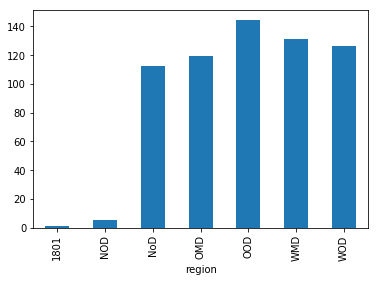

In [9]:
df.groupby('region').title.count().plot(kind='bar')

=> 1801 is an invalid entry. We should really fix the dataset creation.

CHECK: Is NOD similar to NoD?

# Plot number of text per year

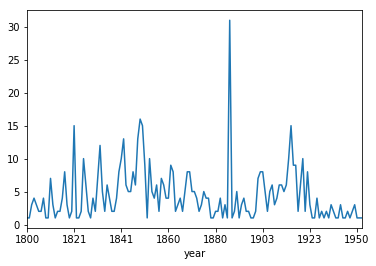

In [75]:
df.groupby('year').title.count().plot()

In [76]:
df.year.value_counts().describe()

count    143.000000
mean       4.461538
std        4.072874
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       31.000000
Name: year, dtype: float64

In [71]:
df[df.year == d]

ValueError: Can only compare identically-labeled Series objects

In [90]:
df_1886 = df[df.year == df.year.value_counts().idxmax()]
df_1886

,Unnamed: 0,genre,period,region,text,title,year
188,188,NEWS,P5,NoD,Aus dem Fürstenthum Lippe und Umgegend.\nDetmo...,Lippische Landeszeitung Detmold,1886
195,195,NEWS,P5,WMD,"Lokales.\nGießen, 4. August. Die bei dem gestr...",Gie˙ener Anzeiger,1886
197,197,NEWS,P5,WMD,Lokales.\n— Am 5. August er. von Morgens 9 Uhr...,Hessische Morgenzeitung,1886
201,201,NEWS,P5,WMD,"Lokales.\nTrier, 3. Aug. Jn den Concursverfahr...",Saar- und Mosel-Zeitung,1886
206,206,NEWS,P5,NoD,"Aus Westfalen, Hessen und Umgegend.\nOeynhause...",WestfÑlisch Schaumburgische Zeitung,1886
217,217,NEWS,P5,OMD,Sächsische und örtliche Angelegenheiten.\nPlau...,VogtlÑndischer Anzeiger Plauen,1886
225,225,NEWS,P5,NoD,"Lokales.\n* Wilhelmshaven, 5. August. In Würdi...",Wilhelmshavener Tageblatt,1886
231,231,NEWS,P5,OMD,"Provinzial-Zeitung.\nBreslau, 6. August.\nIn e...",Breslauer Zeitung,1886
269,269,NEWS,P5,NoD,"Lokales und Provinzielles.\nPosen, den 3. Augu...",Posener Zeitung,1886
280,280,NEWS,P5,WOD,Unglücksfälle und Verbrechen.\n— In der Spinne...,Neue ZÅrcher Zeitung,1886


# Plot genre by region

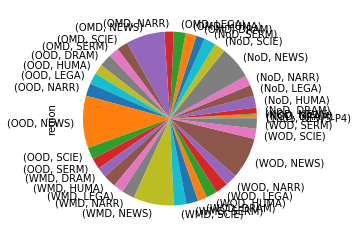

In [20]:
df.groupby(['region', 'genre']).region.count().plot(kind='pie')

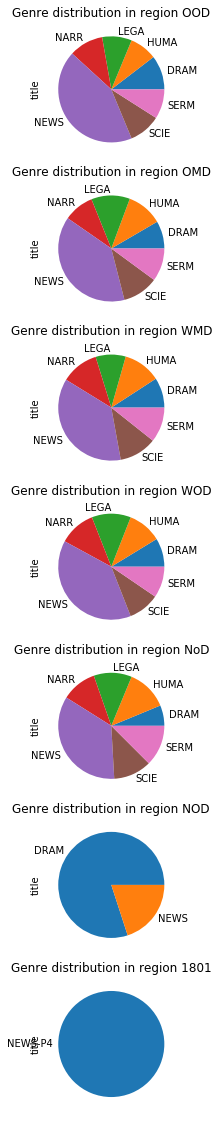

In [49]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df.region.unique()), figsize=(20, 20))
for i, region in enumerate(df.region.unique()):
    df[df.region == region].groupby('genre').title.count().plot(kind='pie',
                                                                ax=axs[i],
                                                                grid=True,
                                                                title=f'Genre distribution in region {region}')

# Plot genre by period

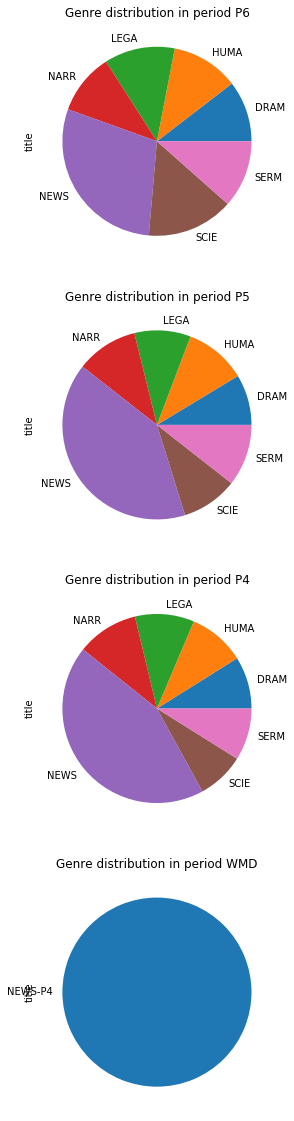

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df.period.unique()), figsize=(20, 20))
for i, period in enumerate(df.period.unique()):
    df[df.period == period].groupby('genre').title.count().plot(kind='pie',
                                                                ax=axs[i],
                                                                grid=True,
                                                                legend=False,
                                                                title=f'Genre distribution in period {period}')